In [21]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [22]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************
    e = y - np.matmul(tx,w)
    return (1/(2*y.shape[0]))*np.sum(np.matmul(np.transpose(e),e))

def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    # ***************************************************
    w = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(tx),tx)),np.transpose(tx)),y)
    mse = compute_loss(y, tx, w)
    return mse, w
    

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [23]:
from helpers import *

def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and loss
    # ***************************************************
    e = y - np.matmul(tx,w)
    return (-1/y.shape[0])*np.matmul(np.transpose(tx), e)

def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    for i in range(0,losses.shape[0]):
        for j in range(0, losses.shape[1]):
            losses[i,j] = compute_loss(y, tx, np.transpose([w0[i],w1[j]]))
    
    return losses

def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        loss = compute_loss(y, tx, w)
        delta = compute_gradient(y, tx, w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - delta*gamma
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************
    # Define the parameters of the algorithm.
    max_iters = 50
    gamma = 0.7

    # Initialization
    w_initial = np.array([0, 0])
    gd_loss, gd_w = gradient_descent(y, tx, w_initial, max_iters, gamma)
    ls_loss, ls_w = least_squares(y, tx)
    print(gd_loss)
    print(ls_loss)
    return 

Test it here

In [24]:
test_your_least_squares()

Gradient Descent(0/49): loss=2792.2367127591665, w0=51.30574540147352, w1=9.435798704492393
Gradient Descent(1/49): loss=265.30246210896195, w0=66.69746902191565, w1=12.266538315840034
Gradient Descent(2/49): loss=37.8783795504416, w0=71.31498610804833, w1=13.115760199244338
Gradient Descent(3/49): loss=17.4102121201745, w0=72.70024123388814, w1=13.370526764265632
Gradient Descent(4/49): loss=15.568077051450453, w0=73.11581777164008, w1=13.446956733772023
Gradient Descent(5/49): loss=15.402284895265298, w0=73.24049073296567, w1=13.469885724623941
Gradient Descent(6/49): loss=15.387363601208634, w0=73.27789262136332, w1=13.476764421879517
Gradient Descent(7/49): loss=15.386020684743533, w0=73.28911318788263, w1=13.478828031056189
Gradient Descent(8/49): loss=15.38589982226167, w0=73.29247935783842, w1=13.47944711380919
Gradient Descent(9/49): loss=15.385888944638303, w0=73.29348920882516, w1=13.47963283863509
Gradient Descent(10/49): loss=15.385887965652202, w0=73.29379216412119, w1=13.

## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [54]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [55]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    # ***************************************************
    print(x.shape[0])
    print(degree)
    degree=degree+1
    ext = np.zeros((x.shape[0], degree))
    for i in range (0,ext.shape[0]):
        for j in range (0,ext.shape[1]):
            ext[i][j] = x[i]**j
    return ext

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [66]:
#from costs import compute_mse
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)
    
    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        # ***************************************************
        aug = build_poly(x, degree)

        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate RMSE: TODO
        # ***************************************************
        mse, w = least_squares(y, aug)
        print("weights: " + str(w))
        print("now comes the aug")
        print(aug)
        
        rmse = np.sqrt(2*mse)
        weights = w
        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

50
1
weights: [ 0.83431835 -0.28976617]
now comes the aug
[[ 1.          0.35237491]
 [ 1.          4.8951233 ]
 [ 1.          1.86662437]
 [ 1.          3.50706129]
 [ 1.          3.38087384]
 [ 1.          0.73093728]
 [ 1.          3.88562366]
 [ 1.          5.65224803]
 [ 1.          6.28318531]
 [ 1.          2.37137419]
 [ 1.          0.60474982]
 [ 1.          3.63324875]
 [ 1.          0.85712473]
 [ 1.          2.49756165]
 [ 1.          1.61424946]
 [ 1.          5.39987312]
 [ 1.          6.15699785]
 [ 1.          6.0308104 ]
 [ 1.          0.47856237]
 [ 1.          2.87612401]
 [ 1.          4.51656093]
 [ 1.          0.98331219]
 [ 1.          1.10949964]
 [ 1.          0.1       ]
 [ 1.          2.11899928]
 [ 1.          1.36187455]
 [ 1.          4.01181111]
 [ 1.          5.77843549]
 [ 1.          4.26418602]
 [ 1.          1.2356871 ]
 [ 1.          2.24518674]
 [ 1.          1.99281183]
 [ 1.          1.48806201]
 [ 1.          4.64274839]
 [ 1.          4.3903734

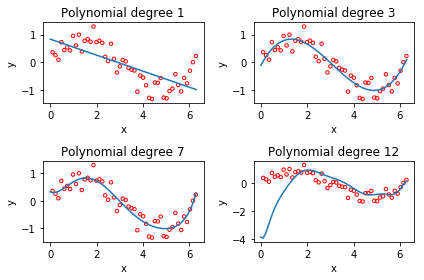

In [67]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [68]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    # ***************************************************
    numpy.random.shuffle(x)
    len = (int)(x.shape[0]*ratio)
    tx = x[0:len]
    test_x = x[len:]
    ty = y[0:len]
    test_y = y[len:]
    return tx, ty, test_x, test_y

Then, test your `split_data` function below.

In [77]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    tx, ty, test_x, test_y = split_data(x, y, ratio, seed=1)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    tx = build_poly(tx, degree)
    test_x = build_poly(tx, degree)
    print(test_x)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calcualte weight through least square.: TODO
    # ***************************************************
    mse1, w = least_squares(y, tx)
    mse2, w = least_squares(y, test_x)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    rmse_tr = np.sqrt(2*mse1)    
    rmse_te = np.sqrt(2*mse2)

    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [78]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

45
1
45
1


ValueError: setting an array element with a sequence.

# 3 Ridge Regression
Please fill in the function below.

In [ ]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    raise NotImplementedError

In [ ]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    raise NotImplementedError

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        # ***************************************************
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)

    raise NotImplementedError


In [ ]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)